# EDA Trend Starter Notebook

## 1. Prerequisites and Loading the Data

In [2]:
# Necessary packages
import numpy as np
import pandas as pd
import re

# Plotting
import matplotlib.pyplot as plt

In [31]:
# Loading the data
trend_df = pd.read_csv('data/quarterly_moving_average_data.csv', index_col=0)
trend_df = trend_df.transpose()

# Extract the quarter names in the index of seasonality_df
temp_dict = dict()

for i in trend_df.index:
    match = re.search(r"Average_MA_20_(\w+)$", i)
    if match:
        temp_dict[i] = match.group(1)
    else:
        pass

trend_df = trend_df.rename(index=temp_dict)

In [32]:
display(trend_df)

,AC,ACEN,AEV,AGI,ALI,AREIT,BDO,BLOOM,BPI,CBC,...,MBT,MER,MONDE,PGOLD,SCC,SM,SMC,SMPH,TEL,URC
Q2_2021,768.628921,7.569759,35.209826,9.936975,34.759671,29.103975,83.004259,6.805457,71.506555,19.976199,...,38.706214,226.961676,12.845653,33.248876,7.216165,954.931720,111.375786,35.630522,988.418187,122.838175
Q3_2021,740.927396,8.698948,36.607679,9.720331,32.760865,29.719575,85.211528,6.028906,70.651069,20.192914,...,36.771317,228.800792,15.130426,35.055296,8.640308,947.042957,107.016218,33.134460,1019.037314,121.907441
Q4_2021,818.159693,11.322948,44.447231,10.446196,33.775336,35.764623,94.970865,6.622948,73.242200,20.250480,...,38.758807,244.180115,16.081129,35.974461,12.661567,944.814895,109.658314,33.577161,1305.398823,117.615738
Q1_2022,820.536633,9.027545,52.499642,11.994262,34.547020,40.984138,99.643635,6.385627,81.197498,21.353098,...,44.997758,276.706738,14.744906,31.801297,14.176222,899.299133,105.154161,34.763120,1437.063963,109.333140
Q2_2022,702.379723,7.563727,47.986554,11.036258,30.567021,34.520171,99.679828,6.162225,81.325470,22.593236,...,43.737151,303.352047,13.045449,29.923189,17.863504,825.396671,101.850946,35.536106,1499.330119,99.179759
Q3_2022,650.357634,7.880544,49.284052,9.349215,25.707618,31.439446,94.309845,6.291031,78.322347,23.916475,...,41.313865,287.183008,13.795647,28.220610,22.824540,794.098078,98.584350,35.403277,1392.656217,106.385922
Q4_2022,644.609515,6.370086,50.879698,8.794565,25.495138,28.810198,97.298142,6.766068,81.347085,23.186000,...,43.538475,254.382957,11.456155,27.412610,21.786323,807.693099,93.951422,32.307371,1305.050826,111.034071
Q1_2023,673.578032,6.926723,50.582008,11.982717,28.501691,30.803822,112.914779,8.706719,90.696245,25.467500,...,48.963590,259.890089,11.636531,29.898738,20.429194,878.057135,99.151710,35.025964,1154.781286,127.882618
Q2_2023,638.596609,5.924312,49.663664,12.714692,25.692380,29.628603,126.895904,9.795014,97.091342,28.311223,...,50.474256,288.707274,8.696380,28.579637,19.889379,884.838018,102.982609,32.438652,1094.109861,132.765454
Q3_2023,604.454224,5.134343,47.464827,12.398354,26.077227,30.271244,133.407718,10.825410,105.364470,28.178230,...,48.680330,309.680173,7.441234,25.837026,21.228903,864.988858,103.109009,30.902015,1118.797873,116.077223


In [33]:
trend_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, Q2_2021 to Q4_2024
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AC      15 non-null     float64
 1   ACEN    15 non-null     float64
 2   AEV     15 non-null     float64
 3   AGI     15 non-null     float64
 4   ALI     15 non-null     float64
 5   AREIT   15 non-null     float64
 6   BDO     15 non-null     float64
 7   BLOOM   15 non-null     float64
 8   BPI     15 non-null     float64
 9   CBC     15 non-null     float64
 10  CNPF    15 non-null     float64
 11  CNVRG   15 non-null     float64
 12  DMC     15 non-null     float64
 13  EMI     15 non-null     float64
 14  GLO     15 non-null     float64
 15  GTCAP   15 non-null     float64
 16  ICT     15 non-null     float64
 17  JFC     15 non-null     float64
 18  JGS     15 non-null     float64
 19  LTG     15 non-null     float64
 20  MBT     15 non-null     float64
 21  MER     15 non-null     float64
 22

## 2. Trend EDA

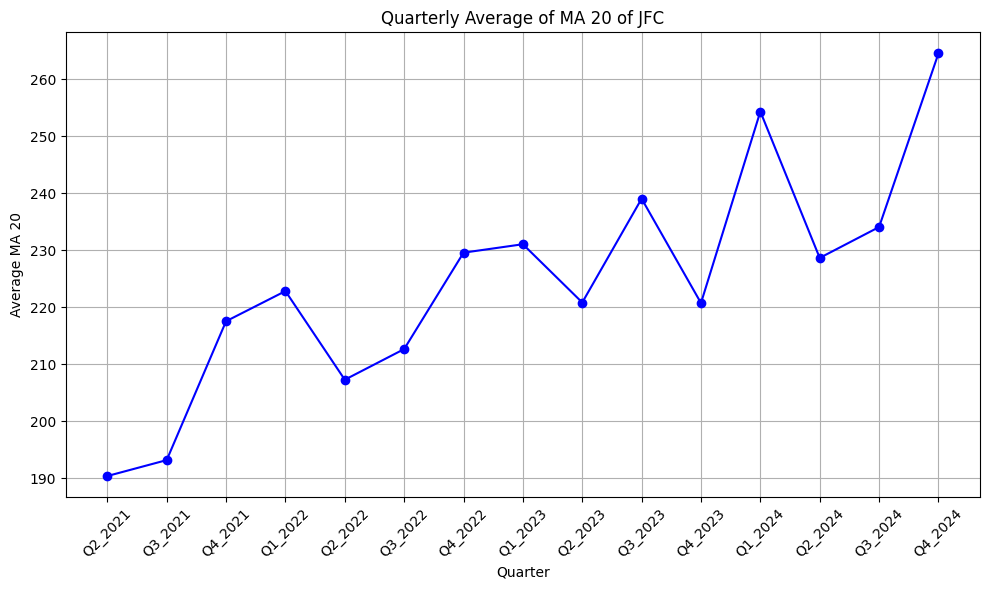

In [35]:
ticker = 'JFC'

plt.figure(figsize=(10, 6))
plt.plot(trend_df.index, trend_df[ticker], marker='o', linestyle='-', color='blue')
plt.title(f"Quarterly Average of MA 20 of {ticker}")
plt.xlabel('Quarter')
plt.ylabel('Average MA 20')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

*{Place analysis of the seasonality of the stock here below the plt graph}*

### Notes in using this Seasonality EDA Starter Notebook

Note: To do the EDA of the trend of the other stock, just duplicate the above code cells and replace the stock ticker in the line `ticker = 'AC'`

* You might also want to consider replacing the color of the line for differentiation to the other stock